#Manualy installing openCV repo that support SURF

In [ ]:
!apt-get install -y cmake libopencv-dev build-essential git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libtesseract-dev libopenblas-dev liblapacke-dev checkinstall



#Repo Cloning

In [ ]:
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git


#Installing eneything that are needed for OpenCV to run SURF Algorithm

In [ ]:
%cd opencv
!mkdir build
%cd build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..
!make -j8
!make install


#Restart Runtime

In [ ]:
import os
os.kill(os.getpid(), 9)


# Import Lib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from PIL import Image


# Step 1: Load Images


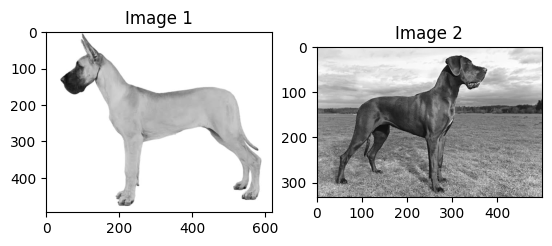

In [ ]:
# Load two images of the same scene/object but from different angles
img1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)

# Display the loaded images
plt.subplot(1, 2, 1), plt.imshow(img1, cmap='gray'), plt.title('Image 1')
plt.subplot(1, 2, 2), plt.imshow(img2, cmap='gray'), plt.title('Image 2')
plt.show()

#Step 2: Extract Keypoints and Descriptors Using SIFT, SURF, and ORB

  # SIFT (Scale-Invariant Feature Transform)
   

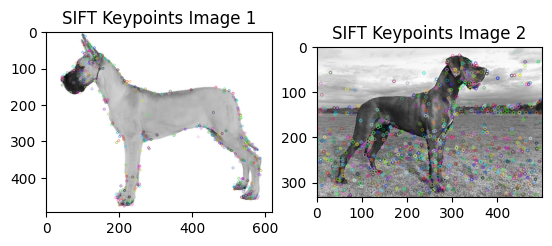

In [ ]:
# Initialize SIFT
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2, None)

# Draw keypoints
img1_sift = cv2.drawKeypoints(img1, kp1_sift, None)
img2_sift = cv2.drawKeypoints(img2, kp2_sift, None)

# Save and display images
cv2.imwrite('sift_keypoints1.jpg', img1_sift)
cv2.imwrite('sift_keypoints2.jpg', img2_sift)

plt.subplot(1, 2, 1), plt.imshow(img1_sift), plt.title('SIFT Keypoints Image 1')
plt.subplot(1, 2, 2), plt.imshow(img2_sift), plt.title('SIFT Keypoints Image 2')
plt.show()


# SURF (Speeded-Up Robust Features)

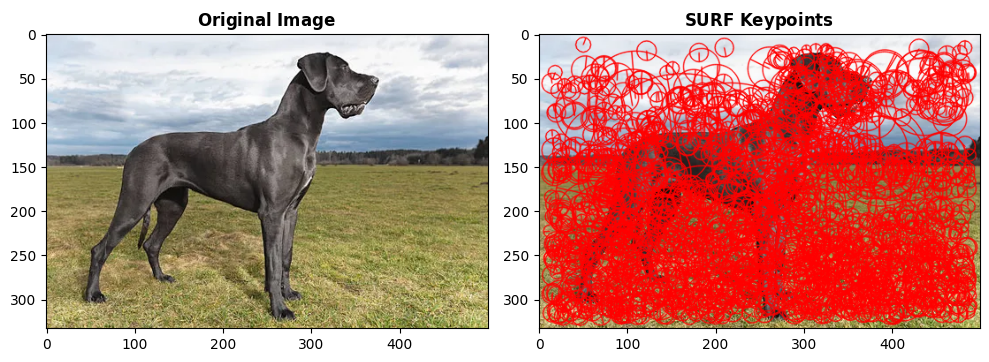

In [ ]:
image_path = 'img2.jpg'
image = Image.open(image_path)
image_np = np.array(image)

#Convert to grayscale for keypoint detection.
gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

#Initialize the SURF.
surf = cv2.xfeatures2d.SURF_create()

#Detect keypoints and compute descriptors.
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

#Draw the detected keypoints.
image_with_keypoints = cv2.drawKeypoints(image_np, keypoints, None, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Display Original Image.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title(r'$\bf{Original\ Image}$')

#Display SURF Keypoints.
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title(r'$\bf{SURF\ Keypoints}$')
plt.tight_layout()
plt.show()

 #  SURF (Speeded-Up Robust Features)

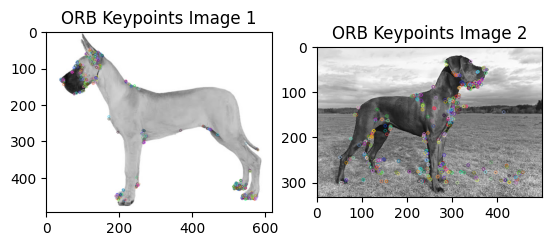

In [ ]:
# Initialize ORB
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2, None)

# Draw keypoints
img1_orb = cv2.drawKeypoints(img1, kp1_orb, None)
img2_orb = cv2.drawKeypoints(img2, kp2_orb, None)

# Save and display images
cv2.imwrite('orb_keypoints1.jpg', img1_orb)
cv2.imwrite('orb_keypoints2.jpg', img2_orb)

plt.subplot(1, 2, 1), plt.imshow(img1_orb), plt.title('ORB Keypoints Image 1')
plt.subplot(1, 2, 2), plt.imshow(img2_orb), plt.title('ORB Keypoints Image 2')
plt.show()


# Step 3: Feature Matching with Brute-Force and FLANN

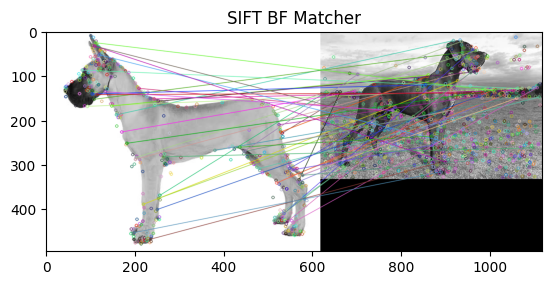

In [ ]:
# Brute-Force matcher for SIFT
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf.match(des1_sift, des2_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

# Draw matches
img_matches_sift = cv2.drawMatches(img1, kp1_sift, img2, kp2_sift, matches_sift[:50], None)

# Save and display matches
cv2.imwrite('sift_bf_match.jpg', img_matches_sift)
plt.imshow(img_matches_sift)
plt.title('SIFT BF Matcher')
plt.show()


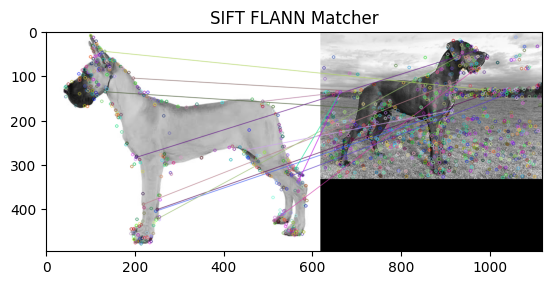

In [ ]:
# FLANN matcher for SIFT
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_sift_flann = flann.knnMatch(des1_sift, des2_sift, k=2)

# Apply ratio test
good_matches = []
for m, n in matches_sift_flann:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches_sift_flann = cv2.drawMatches(img1, kp1_sift, img2, kp2_sift, good_matches[:50], None)

# Save and display matches
cv2.imwrite('sift_flann_match.jpg', img_matches_sift_flann)
plt.imshow(img_matches_sift_flann)
plt.title('SIFT FLANN Matcher')
plt.show()


# Step 4: Image Alignment Using Homography

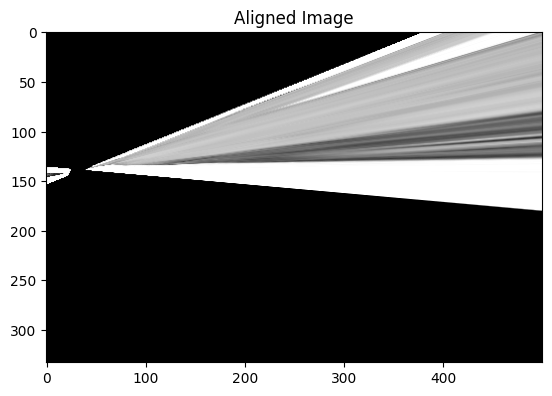

In [ ]:
# Extract location of good matches
src_pts = np.float32([kp1_sift[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2_sift[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Compute Homography matrix
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp image 1 onto image 2
height, width = img2.shape
aligned_image = cv2.warpPerspective(img1, H, (width, height))

# Save and display aligned image
cv2.imwrite('aligned_image.jpg', aligned_image)
plt.imshow(aligned_image, cmap='gray')
plt.title('Aligned Image')
plt.show()


# Step 5: Performance Analysis

In [ ]:
import time

# Function to measure keypoint extraction time
def measure_keypoint_extraction(detector, img, name):
    start_time = time.time()
    keypoints, descriptors = detector.detectAndCompute(img, None)
    end_time = time.time()
    print(f"{name} Keypoints: {len(keypoints)}")
    print(f"{name} Keypoint Extraction Time: {end_time - start_time:.4f} seconds")
    return keypoints, descriptors

# Function to measure matching time
def measure_matching(matcher, descriptors1, descriptors2, name):
    start_time = time.time()
    matches = matcher.match(descriptors1, descriptors2)
    end_time = time.time()
    print(f"{name} Matches: {len(matches)}")
    print(f"{name} Matching Time: {end_time - start_time:.4f} seconds")
    return matches

# Load images
img1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize detectors
sift = cv2.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()  # Ensure OpenCV supports SURF
orb = cv2.ORB_create()

# Brute-Force Matchers
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann_sift = cv2.FlannBasedMatcher(index_params, search_params)

# SIFT Analysis
print("\nSIFT Analysis")
kp_sift_1, des_sift_1 = measure_keypoint_extraction(sift, img1, "SIFT (Image 1)")
kp_sift_2, des_sift_2 = measure_keypoint_extraction(sift, img2, "SIFT (Image 2)")
matches_sift_bf = measure_matching(bf_sift, des_sift_1, des_sift_2, "SIFT Brute-Force Matcher")

# SURF Analysis
print("\nSURF Analysis")
kp_surf_1, des_surf_1 = measure_keypoint_extraction(surf, img1, "SURF (Image 1)")
kp_surf_2, des_surf_2 = measure_keypoint_extraction(surf, img2, "SURF (Image 2)")
matches_surf_bf = measure_matching(bf_sift, des_surf_1, des_surf_2, "SURF Brute-Force Matcher")

# ORB Analysis
print("\nORB Analysis")
kp_orb_1, des_orb_1 = measure_keypoint_extraction(orb, img1, "ORB (Image 1)")
kp_orb_2, des_orb_2 = measure_keypoint_extraction(orb, img2, "ORB (Image 2)")
matches_orb_bf = measure_matching(bf_orb, des_orb_1, des_orb_2, "ORB Brute-Force Matcher")

# SIFT FLANN Matching
print("\nSIFT FLANN Matching Analysis")
start_time = time.time()
matches_sift_flann = flann_sift.knnMatch(des_sift_1, des_sift_2, k=2)
good_matches_sift = []
for m, n in matches_sift_flann:
    if m.distance < 0.7 * n.distance:
        good_matches_sift.append(m)
end_time = time.time()
print(f"SIFT FLANN Matches: {len(good_matches_sift)}")
print(f"SIFT FLANN Matching Time: {end_time - start_time:.4f} seconds")

# Performance Summary
print("\nPerformance Summary:")
print(f"SIFT Keypoints (Image 1): {len(kp_sift_1)}, (Image 2): {len(kp_sift_2)}")
print(f"SURF Keypoints (Image 1): {len(kp_surf_1)}, (Image 2): {len(kp_surf_2)}")
print(f"ORB Keypoints (Image 1): {len(kp_orb_1)}, (Image 2): {len(kp_orb_2)}")

print(f"SIFT BF Matches: {len(matches_sift_bf)}, SURF BF Matches: {len(matches_surf_bf)}, ORB BF Matches: {len(matches_orb_bf)}")
print(f"SIFT FLANN Matches: {len(good_matches_sift)}")



SIFT Analysis
SIFT (Image 1) Keypoints: 398
SIFT (Image 1) Keypoint Extraction Time: 0.1153 seconds
SIFT (Image 2) Keypoints: 926
SIFT (Image 2) Keypoint Extraction Time: 0.0797 seconds
SIFT Brute-Force Matcher Matches: 109
SIFT Brute-Force Matcher Matching Time: 0.0229 seconds

SURF Analysis
SURF (Image 1) Keypoints: 570
SURF (Image 1) Keypoint Extraction Time: 0.1946 seconds
SURF (Image 2) Keypoints: 1709
SURF (Image 2) Keypoint Extraction Time: 0.2741 seconds
SURF Brute-Force Matcher Matches: 142
SURF Brute-Force Matcher Matching Time: 0.0334 seconds

ORB Analysis
ORB (Image 1) Keypoints: 477
ORB (Image 1) Keypoint Extraction Time: 0.0067 seconds
ORB (Image 2) Keypoints: 500
ORB (Image 2) Keypoint Extraction Time: 0.0065 seconds
ORB Brute-Force Matcher Matches: 99
ORB Brute-Force Matcher Matching Time: 0.0101 seconds

SIFT FLANN Matching Analysis
SIFT FLANN Matches: 0
SIFT FLANN Matching Time: 0.0177 seconds

Performance Summary:
SIFT Keypoints (Image 1): 398, (Image 2): 926
SURF K